#  Binary Classification Problem 

### Problem 1: Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column. 

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below. 

### Questions:

1. Preform Logistic Regression on the two features  "meanfun" and "IQR" and draw the boundary. 

2. graphing the resulting fits. How does the two feature fit compare to the fit on all features?

3. Preform Logistic Regression on all the features and print the socre.

In [2]:
import pandas as pd

data = pd.read_csv("voice.csv")

data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
names = list(data)
print(names)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


In [4]:
X = data.drop(columns=["label"]) 
y = data["label"] 
X = (X - X.mean()) / X.std()  # standarize the data

In [5]:
y_train = pd.get_dummies(y) 
X_train = X[['meanfun',"IQR"]] 

In [6]:
y.value_counts()

male      1584
female    1584
Name: label, dtype: int64

# Logistic Regression: meanfun vs. IQR

Score:  0.9655934343434344


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(0.0026743577721741203, 0.2641085745628723)

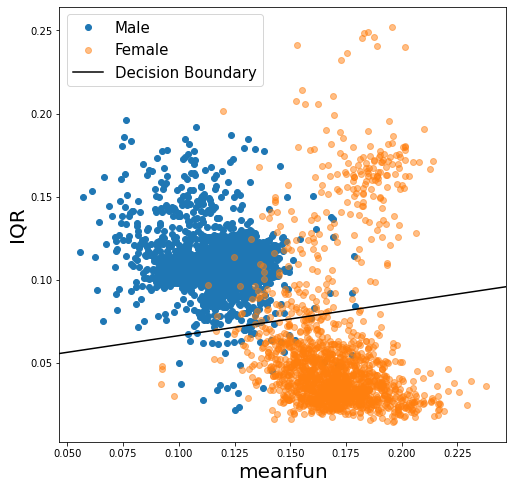

In [7]:
from sklearn.linear_model import LogisticRegression
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
clf=LogisticRegression()
clf.fit(X_train,y)
print("Score: ", clf.score(X_train,y))


f, ax = plt.subplots(figsize=(8,8))
I_m=y=="male"
I_f=y=="female"
plt.plot(data["meanfun"][I_m],data["IQR"][I_m],'o', label="Male")
plt.plot(data["meanfun"][I_f],data["IQR"][I_f],'o', label="Female", alpha=0.5)
xm,xM=plt.xlim()
ym,yM=plt.ylim()
XX, YY = np.meshgrid(np.linspace(xm,xM,100),np.linspace(ym,yM,100))
grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)
ZZ = clf.predict(grid).reshape(XX.shape)
z1 = ZZ == 'M'
z2 = ZZ == 'F'
plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")
B0 = clf.intercept_
B = clf.coef_
u = np.linspace(xm,xM, 2)
plt.plot(u,label="Decision Boundary",color="black")
plt.xlabel("meanfun",fontsize=20)
plt.ylabel("IQR",fontsize=20)
plt.legend(fontsize=15)
ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

# Logistic Regression on all Features

In [10]:
X.head()
clf_tot = LogisticRegression()
clf_tot.fit(X,y)

print("Score: %.3f"%clf_tot.score(X,y))

Score: 0.975


The score for the total regression is higher than the two-variable regression, leading to a stronger fit (ignore the algorithm below, origanlly written for the binomial regression of all combinations of variables).  

In [ ]:
 for i in range(0,len(X.columns)):
    if i!= len(X):
        for j in range(i+1,len(X.columns)):
            clf_i_j=LogisticRegression()
            Xt_i_j=X[[X.columns[i],X.columns[j]]]
            clf_i.fit(Xt_i_j,y)
            print("Score (", X.columns[i], ",", X.columns[j], "):", clf.score(Xt_i_j,y))